   Study Hours  Prior Grades  Study Method  Exam Scores
0     5.745071     55.846293             2    47.876799
1     4.792604     65.793547             2    46.618875
2     5.971533     66.572855             1    53.039202
3     7.284545     61.977227             1    54.644008
4     4.648770     68.387143             1    43.894926


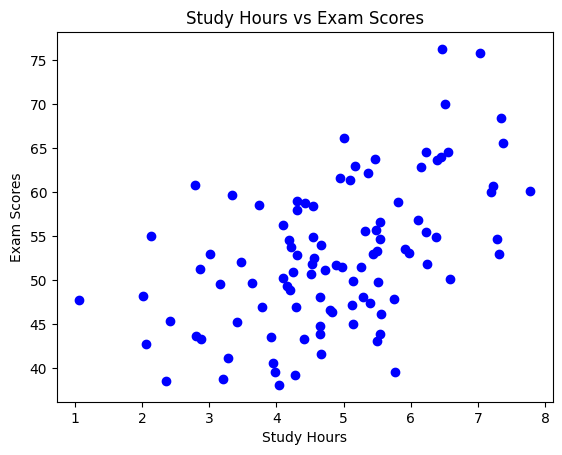

Mean Squared Error: 37.84946758089309
R-squared: 0.3466990933286228


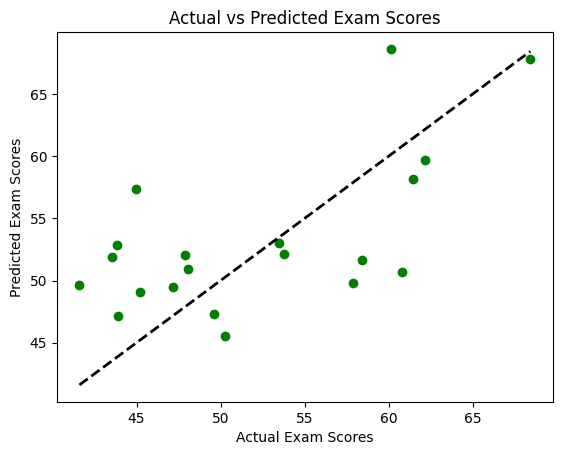

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create dummy data
np.random.seed(42)  # For reproducibility
study_hours = np.random.normal(5, 1.5, 100)  # Average 5 hours with some variation
prior_grades = np.random.normal(70, 10, 100)  # Prior grades out of 100
study_method = np.random.choice([1, 2, 3], size=100)  # Study method (1: self-study, 2: group study, 3: online courses)

# Calculate a dummy target (exam scores) with some noise
exam_scores = (study_hours * 3) + (prior_grades * 0.4) + (study_method * 5) + np.random.normal(0, 5, 100)

# Create a DataFrame
data = pd.DataFrame({
    'Study Hours': study_hours,
    'Prior Grades': prior_grades,
    'Study Method': study_method,
    'Exam Scores': exam_scores
})

# Display the first few rows of the data
print(data.head())

# Visualize the relationship between study hours and exam scores
plt.scatter(data['Study Hours'], data['Exam Scores'], color='blue')
plt.title("Study Hours vs Exam Scores")
plt.xlabel("Study Hours")
plt.ylabel("Exam Scores")
plt.show()

# Prepare the features (X) and target (y)
X = data[['Study Hours', 'Prior Grades', 'Study Method']]
y = data['Exam Scores']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict exam scores using the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print out the performance metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualizing the predicted vs actual values
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Actual vs Predicted Exam Scores")
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.show()

